In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [2]:
file_path = "adult.data"
columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation",
           "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
data = pd.read_csv(file_path, names=columns, na_values='?')


In [3]:
data.columns = columns
data_count = data.count()
print(data_count)

age               32561
workclass         32561
fnlwgt            32561
education         32561
education-num     32561
marital-status    32561
occupation        32561
relationship      32561
race              32561
sex               32561
capital-gain      32561
capital-loss      32561
hours-per-week    32561
native-country    32561
income            32561
dtype: int64


In [4]:
data.replace(' ?', pd.NA, inplace=True)
data_count_after_replace = data.count()
print(data_count_after_replace)

age               32561
workclass         30725
fnlwgt            32561
education         32561
education-num     32561
marital-status    32561
occupation        30718
relationship      32561
race              32561
sex               32561
capital-gain      32561
capital-loss      32561
hours-per-week    32561
native-country    31978
income            32561
dtype: int64


In [5]:
data.drop_duplicates(inplace=True)

jumlah_data_setelah_drop = data.shape[0]  # Untuk jumlah baris
print("Jumlah data setelah menghapus duplikat:", jumlah_data_setelah_drop)

Jumlah data setelah menghapus duplikat: 32537


In [6]:
data = data.loc[:, data.apply(pd.Series.nunique) != 1]

# Menampilkan jumlah baris dan kolom setelah penghapusan fitur dengan nilai konstan
jumlah_data_setelah_drop_fitur = data.shape[0]  # Untuk jumlah baris
print("Jumlah data setelah penghapusan fitur dengan nilai konstan:", jumlah_data_setelah_drop_fitur)

Jumlah data setelah penghapusan fitur dengan nilai konstan: 32537


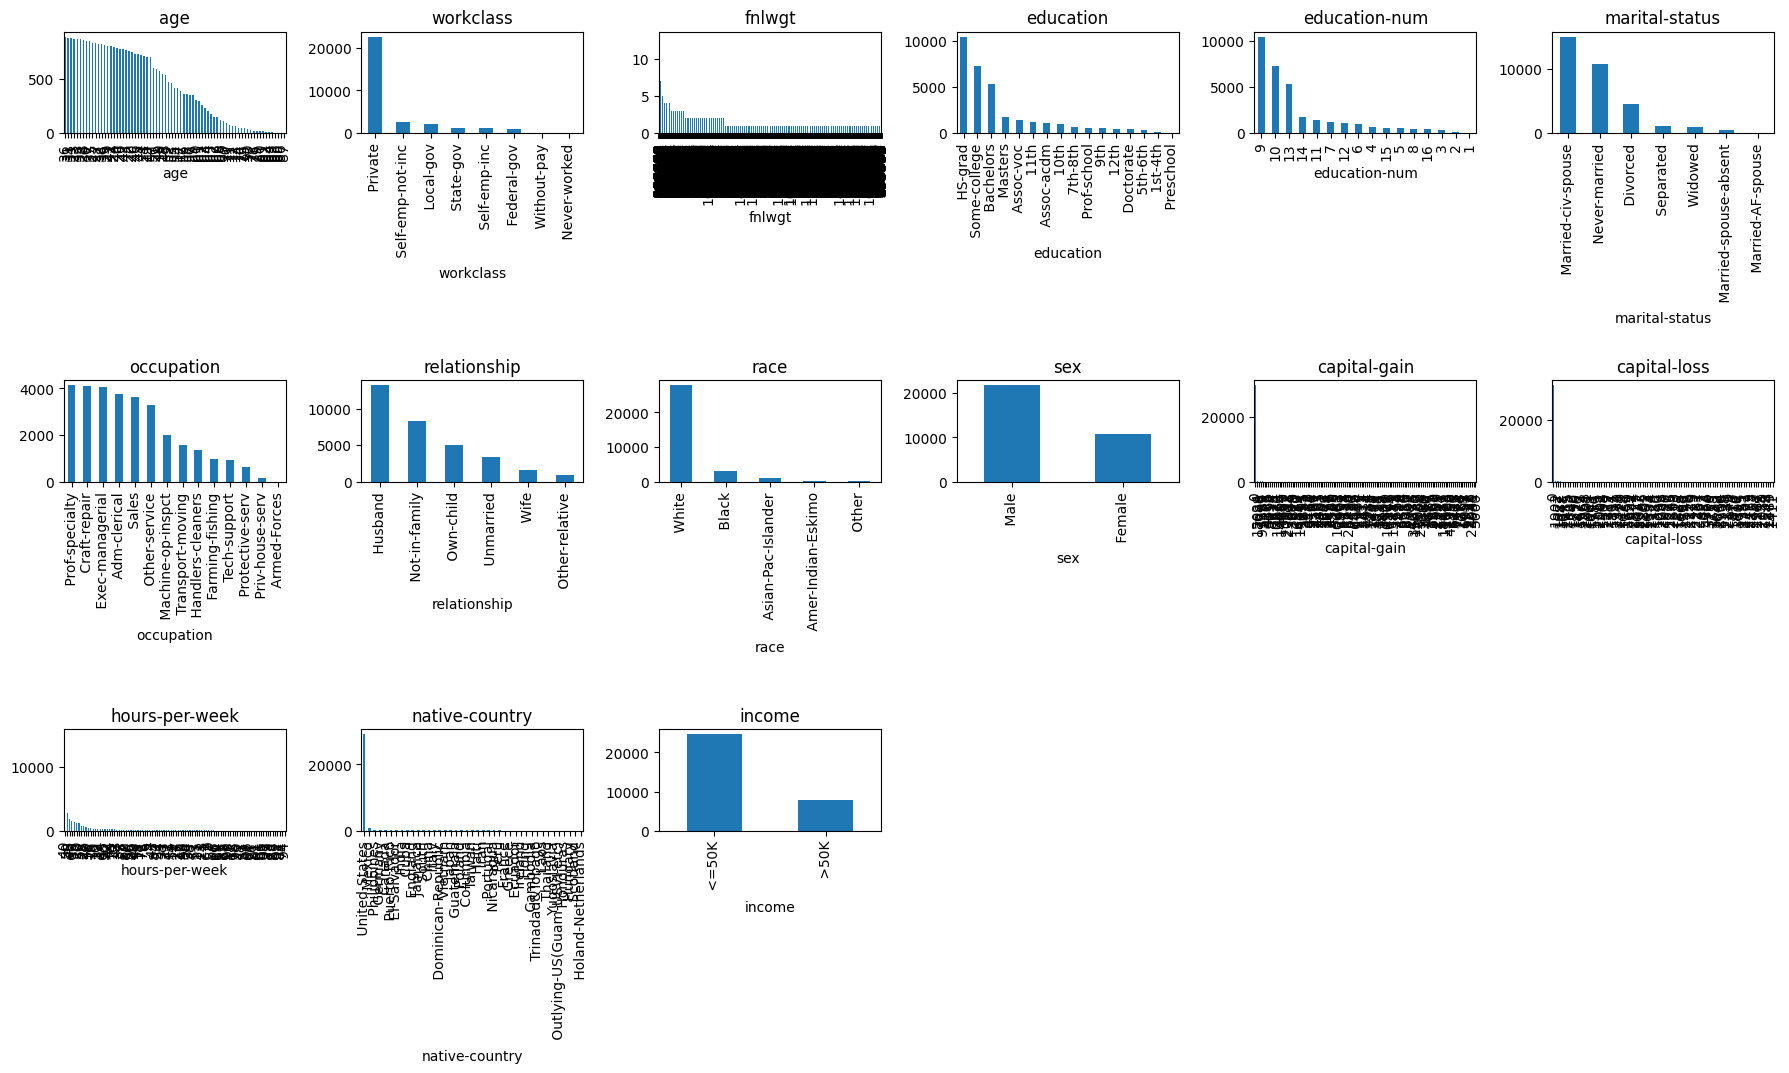

In [7]:
plt.figure(figsize=(18, 12))
for i, column in enumerate(data.columns[:22]):
    plt.subplot(4, 6, i+1)
    data[column].value_counts().plot(kind='bar', title=column)
plt.tight_layout()
plt.show()

In [19]:
categorical_features = data.select_dtypes(include=['object']).columns
print(categorical_features)

Index([], dtype='object')


In [18]:
data.fillna(data.mode().iloc[0], inplace=True)

jumlah_data_setiap_kolom_setelah_fillna = data.count()
print(jumlah_data_setiap_kolom_setelah_fillna)

age               32537
workclass         32537
fnlwgt            32537
education         32537
education-num     32537
marital-status    32537
occupation        32537
relationship      32537
race              32537
sex               32537
capital-gain      32537
capital-loss      32537
hours-per-week    32537
native-country    32537
income            32537
dtype: int64


In [20]:
print("Data sebelum diubah ke ordinal:")
print(data.head())

Data sebelum diubah ke ordinal:
   age  workclass  fnlwgt  education  education-num  marital-status  \
0   39        6.0   77516        9.0             13             4.0   
1   50        5.0   83311        9.0             13             2.0   
2   38        3.0  215646       11.0              9             0.0   
3   53        3.0  234721        1.0              7             2.0   
4   28        3.0  338409        9.0             13             2.0   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0         0.0           1.0   4.0  1.0          2174             0   
1         3.0           0.0   4.0  1.0             0             0   
2         5.0           1.0   4.0  1.0             0             0   
3         5.0           0.0   2.0  1.0             0             0   
4         9.0           5.0   2.0  0.0             0             0   

   hours-per-week  native-country  income  
0              40            38.0     0.0  
1              13            38.

In [21]:
encoder = OrdinalEncoder()
data[categorical_features] = encoder.fit_transform(data[categorical_features])
data_ordinal = data[categorical_features]
print("\nData setelah diubah ke ordinal:")
print(data_ordinal.head())


Data setelah diubah ke ordinal:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


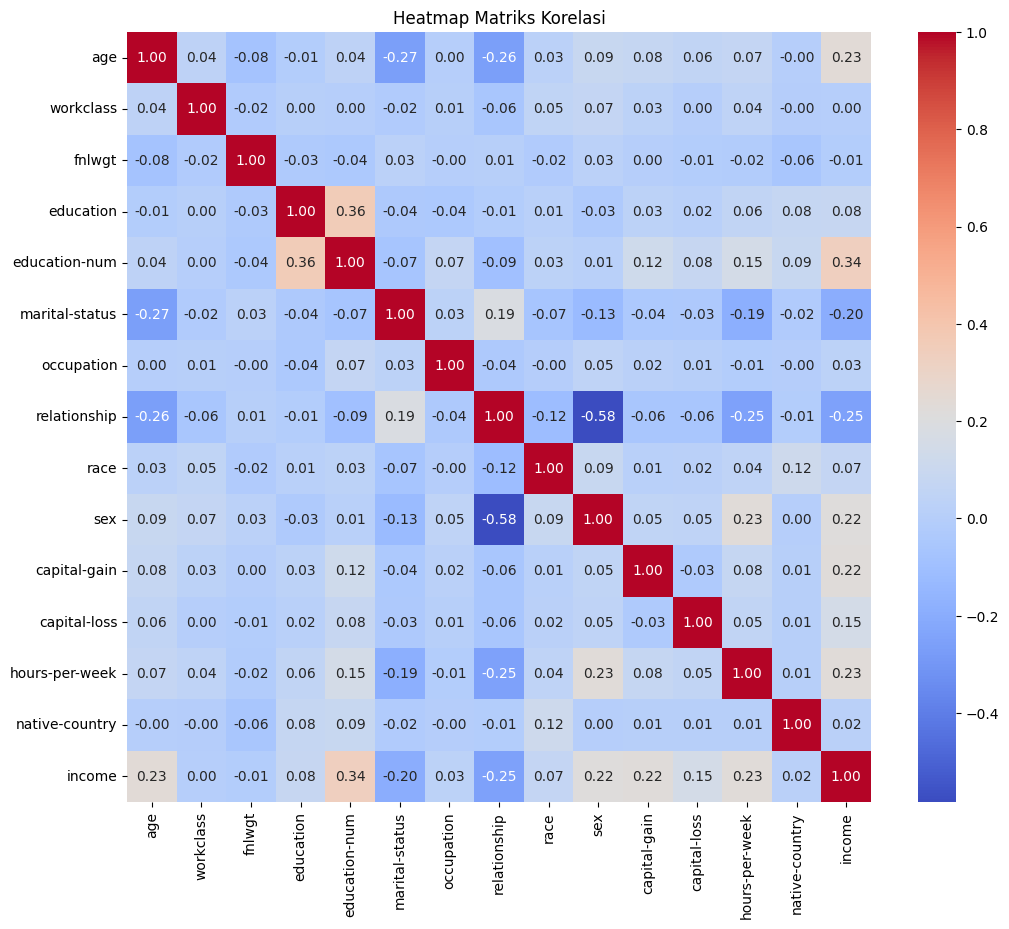

In [12]:
# Menghitung matriks korelasi
correlation_matrix = data.corr()

# Menampilkan heatmap dari matriks korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Matriks Korelasi")
plt.show()

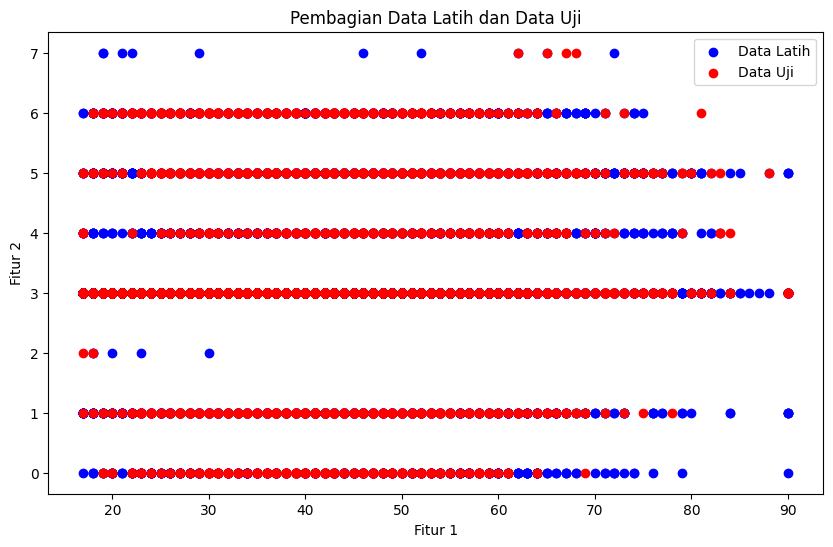

In [13]:
X = data.drop('income', axis=1)
y = data['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mendefinisikan warna untuk data latih dan data uji
train_color = 'blue'
test_color = 'red'

# Membuat scatter plot untuk data latih dan data uji
plt.figure(figsize=(10, 6))
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], color=train_color, label='Data Latih')
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], color=test_color, label='Data Uji')

# Memberi judul dan label sumbu pada plot
plt.title('Pembagian Data Latih dan Data Uji')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

Parameter optimal: {'max_depth': 7, 'min_samples_split': 20}


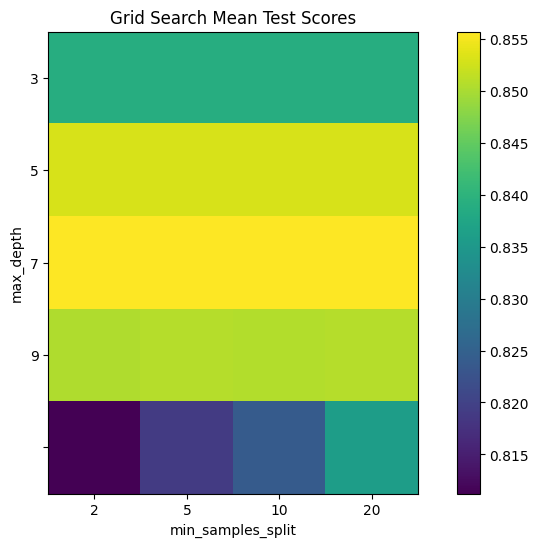

In [14]:
# Inisialisasi model Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Set parameter grid yang akan diuji
param_grid = {'max_depth': [3, 5, 7, 9, None], 'min_samples_split': [2, 5, 10, 20]}

# Membuat objek GridSearchCV
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Melakukan pencarian parameter optimal
grid_search.fit(X_train, y_train)

# Mendapatkan parameter terbaik
best_params = grid_search.best_params_
print("Parameter optimal:", best_params)

# Menyimpan hasil pencarian parameter ke dalam array numpy
scores = np.array(grid_search.cv_results_['mean_test_score']).reshape(5, 4)

# Membuat heatmap untuk hasil pencarian parameter
plt.figure(figsize=(10, 6))
plt.imshow(scores, interpolation='nearest', cmap='viridis')
plt.xlabel('min_samples_split')
plt.ylabel('max_depth')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['min_samples_split'])), param_grid['min_samples_split'])
plt.yticks(np.arange(len(param_grid['max_depth'])), param_grid['max_depth'])
plt.title('Grid Search Mean Test Scores')
plt.show()


Hasil evaluasi pada data training:
Akurasi: 0.8595028621921703
Presisi: 0.7966413618587531
Recall: 0.5553239255933291

Hasil evaluasi pada data testing:
Akurasi: 0.8543331284572834
Presisi: 0.7931960608773501
Recall: 0.5527136618839675


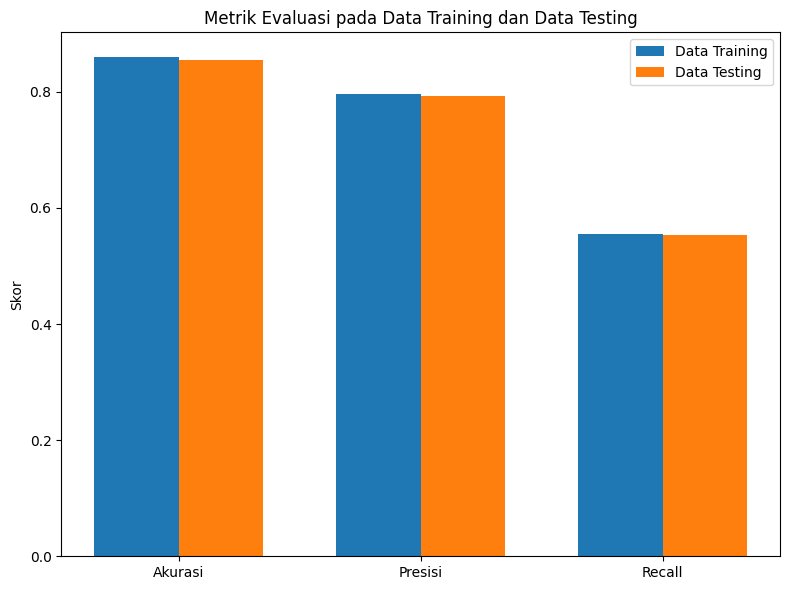

In [15]:
# Gunakan grid search untuk mencari parameter optimal dan mendapatkan model terbaik
grid_search.fit(X_train, y_train)
best_dt = grid_search.best_estimator_

# Lakukan prediksi menggunakan model terbaik
y_train_pred = best_dt.predict(X_train)
y_test_pred = best_dt.predict(X_test)

# Hitung metrik evaluasi
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)

# Menampilkan hasil evaluasi
print("Hasil evaluasi pada data training:")
print("Akurasi:", train_accuracy)
print("Presisi:", train_precision)
print("Recall:", train_recall)
print("\nHasil evaluasi pada data testing:")
print("Akurasi:", test_accuracy)
print("Presisi:", test_precision)
print("Recall:", test_recall)

# Menyimpan metrik evaluasi ke dalam list
labels = ['Akurasi', 'Presisi', 'Recall']
train_scores = [train_accuracy, train_precision, train_recall]
test_scores = [test_accuracy, test_precision, test_recall]

x = np.arange(len(labels))  # Lokasi label pada sumbu x

# Lebar batang
bar_width = 0.35  

# Membuat grafik batang
fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - bar_width/2, train_scores, bar_width, label='Data Training')
bars2 = ax.bar(x + bar_width/2, test_scores, bar_width, label='Data Testing')

# Menambahkan label, judul, dan keterangan
ax.set_ylabel('Skor')
ax.set_title('Metrik Evaluasi pada Data Training dan Data Testing')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Menampilkan grafik batang
plt.tight_layout()
plt.show()

Confusion Matrix:
[[4674  231]
 [ 717  886]]


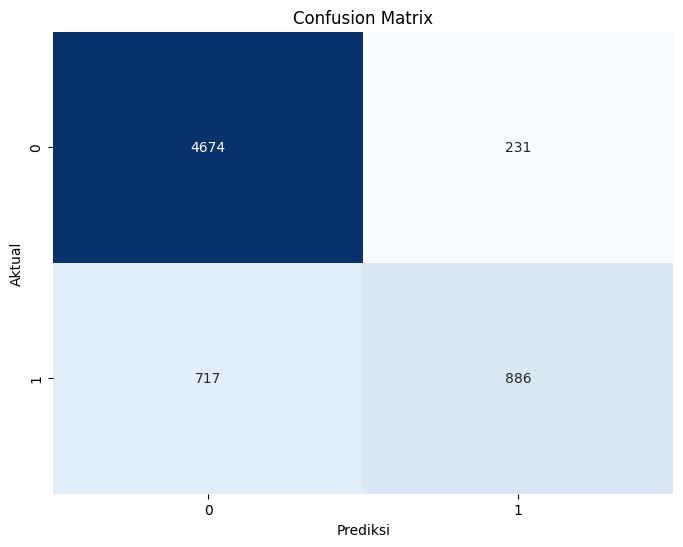

In [16]:
# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Menampilkan confusion matrix dalam bentuk heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()